Establish frameworks & Data Understanding

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from statistics import mean

iris = datasets.load_iris()
d = iris.data[:,:2]
df=pd.DataFrame(data=d, columns=['Length','Width'])

# Display the dataframe
df


,Length,Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Modeling

In [7]:
# Create model
model=smf.ols('Length~Width', df).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.007   
Dependent Variable: Length           AIC:                369.9917
Date:               2023-10-09 13:37 BIC:                376.0129
No. Observations:   150              Log-Likelihood:     -183.00 
Df Model:           1                F-statistic:        2.074   
Df Residuals:       148              Prob (F-statistic): 0.152   
R-squared:          0.014            Scale:              0.68078 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       6.5262    0.4789  13.6276  0.0000   5.5799  7.4726
Width          -0.2234    0.1551  -1.4403  0.1519  -0.5298  0.0831
-----------------------------------------------------------------
Omnibus:              4.389        Durbin-Watson:           0.952
Prob(Omnibus):        

Evaluation


Mean of residuals =  -1.1487107561454952e-15


C:\Users\elder\AppData\Local\Temp\ipykernel_74348\979680692.py:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Residuals, ax=ax_hist, color='orchid')


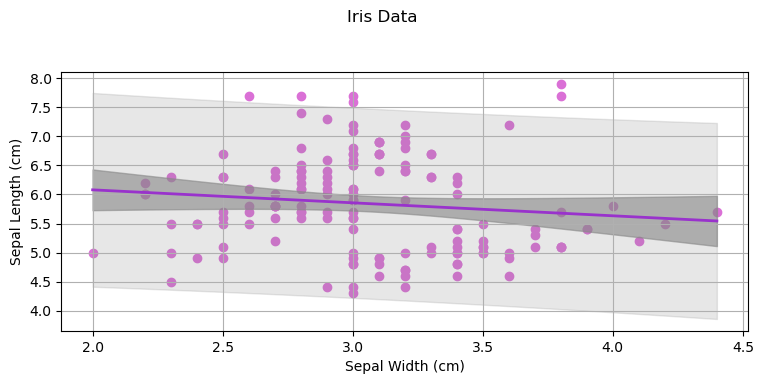

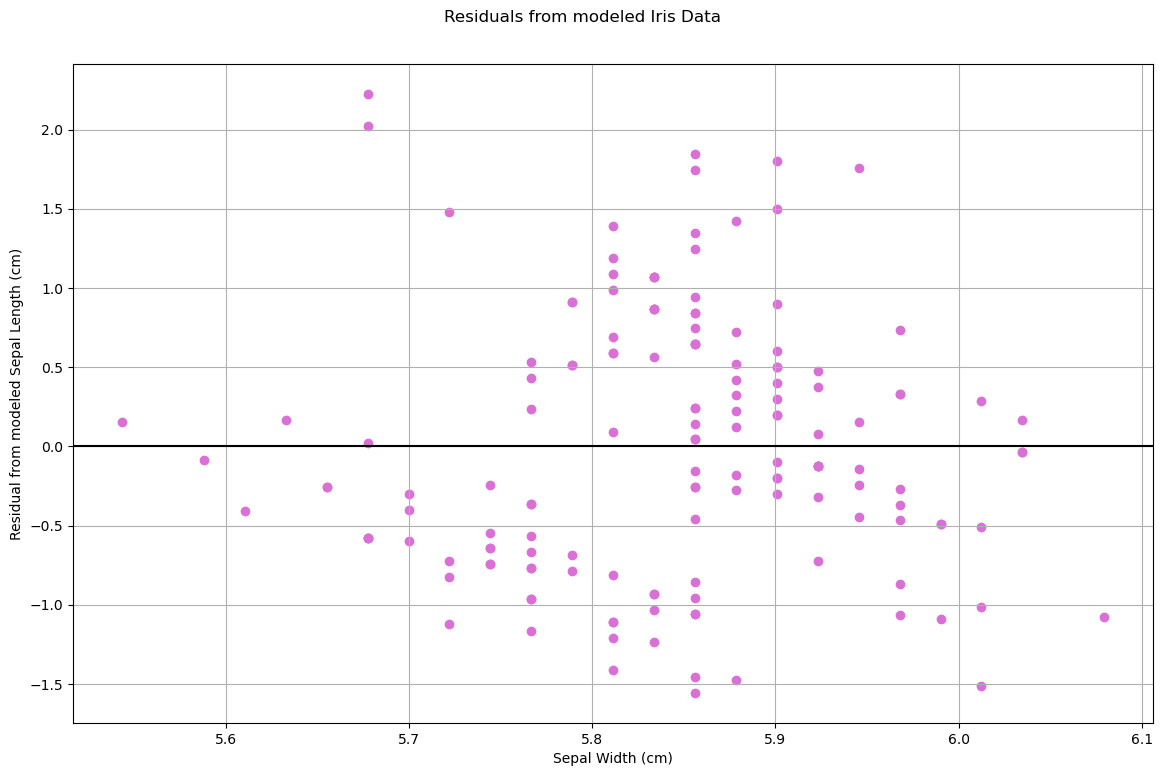

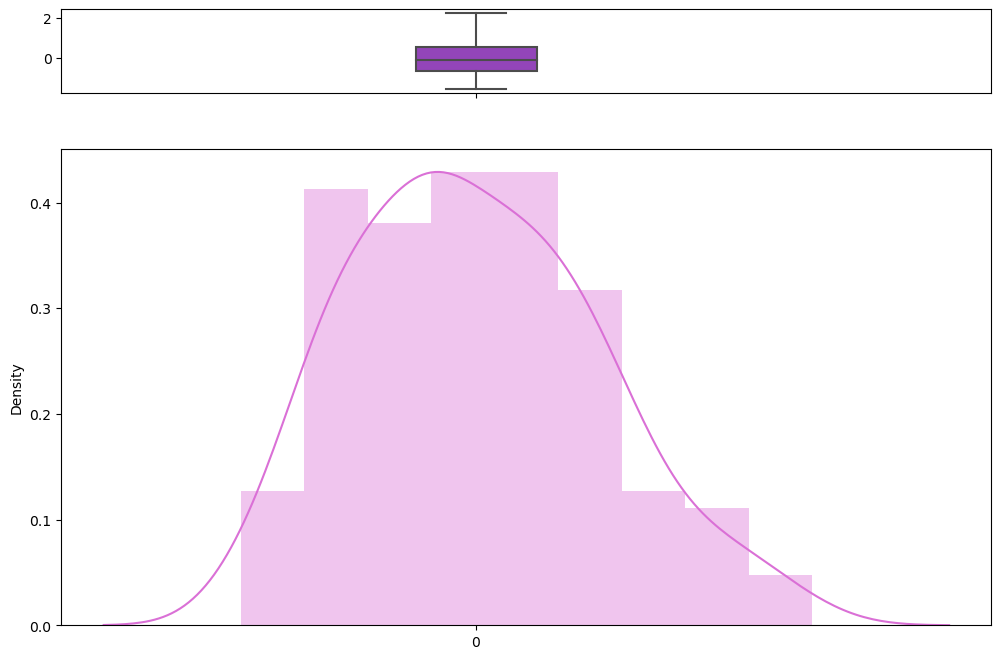

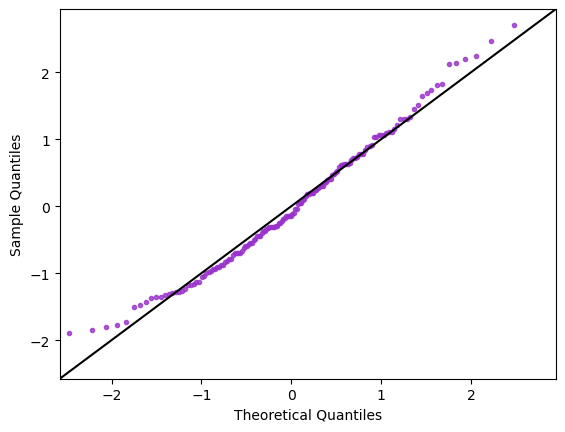

In [8]:
# Plot model, data & confidence intervals
Beta0=model.params[0]
Beta1=model.params[1]

fitted = lambda xx: Beta0+Beta1*xx

fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df['Width'], df['Length'], alpha=1.0, color='orchid')
fig.suptitle('Iris Data')
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Sepal Length (cm)")
fig.tight_layout(pad=2);
ax.grid(True)

x_pred = np.linspace(df['Width'].min(),df['Width'].max(),200)
y_pred = fitted(x_pred)
ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)

dfpred = pd.DataFrame({'Width':x_pred, 'Length':y_pred})
prediction = model.get_prediction(dfpred)
predints = prediction.summary_frame(alpha=0.05)


ax.fill_between(x_pred, predints['mean_ci_lower'], predints['mean_ci_upper'], color='#888888', alpha=0.6)
ax.fill_between(x_pred, predints['obs_ci_lower'], predints['obs_ci_upper'], color='#888888', alpha=0.2)

#Pull Residuals
Residuals=model.resid
Fitted_Values=model.fittedvalues

print("\nMean of residuals = ",mean(Residuals))

#Plot Residuals vs Fitted Values
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(Fitted_Values, Residuals, alpha=1.0, color='orchid')
fig.suptitle('Residuals from modeled Iris Data')
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Residual from modeled Sepal Length (cm)")
fig.tight_layout(pad=2);
ax.grid(True)
plt.axhline(y=0,color='black')

# Create QQ plot
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(12,8))
sns.boxplot(Residuals, ax=ax_box, color='darkorchid')
sns.distplot(Residuals, ax=ax_hist, color='orchid')
ax_box.set(xlabel='')
f.savefig('Norm1.png', dpi=300)
pp = sm.ProbPlot(Residuals, stats.norm, fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='darkorchid', markeredgecolor='darkorchid', alpha=0.8)
sm.qqline(qq.axes[0], line='45', fmt='k--')

